# Python Interview Questions

In [1]:
# extension to help clean python code
!pip install nb_black

In [2]:
# check if lab_black is loaded
%load_ext lab_black

## 1. Stock prices: buy or sell

### 1.1 Buy / sell (method 1)

Write a function that outputs the maximum profits buy buying and selling at a specific interval.
- input : stock_price = [10,5,20,32,25,12]
- output: get_max_profit(stock_prices) -> 27

In [3]:
# function to get maximum profit
def get_max_profit(input_list):
    # size of the list
    size = len(input_list)

    # variables
    max_profit = input_list[1] - input_list[0]
    min_value = input_list[0]

    # for each stock price in the list
    for i in range(1, size):
        # if new value in the list - current min_value is higher then current profit, keep it as max_profit
        if input_list[i] - min_value > max_profit:
            max_profit = input_list[i] - min_value

        # if new value is lower then current min_value, become the new min_value
        if input_list[i] < min_value:
            min_value = input_list[i]

    print("Our maximum profit is %s" % max_profit)
    return max_profit

In [4]:
stock_price = [10, 20, 5, 32, 25, 12]
get_max_profit(stock_price)

Our maximum profit is 27


27

In [5]:
# double checking with other another stock price list
stock_price = [10, 20, 32, 5, 25, 12]
get_max_profit(stock_price)

Our maximum profit is 22


22

### 1.2 Buy / sell (method 2)

In [6]:
# alternative method
def get_max_profit(stock_list):
    # initial max_profit list setup
    max_profit = [0, 0, 0]

    # for every price in the list
    for i in range(len(stock_list)):
        # for every price after the i price in the list
        for j in range(i + 1, len(stock_list)):
            # profit = next day price - day price
            profit = stock_list[j] - stock_list[i]

            if profit > 0:
                # if new max_profit higher than current profit, become new profit
                if max_profit[2] <= profit:
                    max_profit[0] = i + 1
                    max_profit[1] = j + 1
                    max_profit[2] = profit

    print(
        "We buy on day %s and sell on day %s to get a maximum profit of %s"
        % (max_profit[0], max_profit[1], max_profit[2])
    )

    return max_profit[2]

In [7]:
stock_price = [10, 20, 5, 32, 25, 12]
get_max_profit(stock_price)

We buy on day 3 and sell on day 4 to get a maximum profit of 27


27

In [8]:
stock_price = [10, 20, 32, 5, 25, 12]
get_max_profit(stock_price)

We buy on day 1 and sell on day 3 to get a maximum profit of 22


22

### 1.3 Datetime complexity

Give a list of stock prices and date times, output the profit and stard/end dates for max profit.

In [9]:
# new function to get maximum profit with date times
def get_max_profit(input_list, dates):
    # size of the list
    size = len(input_list)

    # previous variables
    max_profit = input_list[1] - input_list[0]
    min_value = input_list[0]

    # additional starting points
    sell = 1
    buy = 0
    temp_min = 0

    # for each item in the list
    for i in range(1, size):
        if input_list[i] - min_value > max_profit:
            max_profit = input_list[i] - min_value
            # save item index for the date of sell and buy
            sell = i
            buy = temp_min

        if input_list[i] < min_value:
            min_value = input_list[i]
            # save item index for the date of the new min_value
            temp_min = i

    print(
        "Buy stock on %s and sell on %s to get a maximum profit of %s"
        % (dates[buy], dates[sell], max_profit)
    )
    return max_profit

In [10]:
# define stock_price and dates lists
stock_price = [10, 20, 5, 32, 25, 12]

dates = [
    "2023-01-01",
    "2023-01-02",
    "2023-01-03",
    "2023-01-04",
    "2023-01-05",
    "2023-01-06",
]

get_max_profit(stock_price, dates)

Buy stock on 2023-01-03 and sell on 2023-01-04 to get a maximum profit of 27


27

In [11]:
# from alternative method from 1.2 (method 2)
def get_max_profit(stock_list, dates):
    max_profit = [0, 0, 0]

    for i in range(len(stock_list)):
        for j in range(i + 1, len(stock_list)):
            profit = stock_list[j] - stock_list[i]
            if profit > 0:
                if max_profit[2] <= profit:
                    # save lowest price item date
                    max_profit[0] = dates[i + 1]
                    # save highest price item date
                    max_profit[1] = dates[j + 1]
                    # save profit between the two prices for the two dates
                    max_profit[2] = profit

                # what's happening in the for loop explanation
                print(
                    "Comparing %s to %s resulting in a profit of %s"
                    % (stock_list[i], stock_list[j], profit)
                )

    # output
    print(
        "---------------------------------------------------------------------------------"
    )
    print(
        "Buy stock on %s and sell on %s to get a maximum profit of %s"
        % (max_profit[0], max_profit[1], max_profit[2])
    )
    return max_profit

In [12]:
# previous stock_price and dates lists
stock_price = [10, 20, 5, 32, 25, 12]

dates = [
    "2023-01-01",
    "2023-01-02",
    "2023-01-03",
    "2023-01-04",
    "2023-01-05",
    "2023-01-06",
]

day_to_buy, day_to_sell, profit = get_max_profit(stock_price, dates)

Comparing 10 to 20 resulting in a profit of 10
Comparing 10 to 32 resulting in a profit of 22
Comparing 10 to 25 resulting in a profit of 15
Comparing 10 to 12 resulting in a profit of 2
Comparing 20 to 32 resulting in a profit of 12
Comparing 20 to 25 resulting in a profit of 5
Comparing 5 to 32 resulting in a profit of 27
Comparing 5 to 25 resulting in a profit of 20
Comparing 5 to 12 resulting in a profit of 7
---------------------------------------------------------------------------------
Buy stock on 2023-01-04 and sell on 2023-01-05 to get a maximum profit of 27


In [13]:
# change stock price fluctuations
stock_price = [10, 5, 20, 32, 25, 12]

dates = [
    "2023-01-01",
    "2023-01-02",
    "2023-01-03",
    "2023-01-04",
    "2023-01-05",
    "2023-01-06",
]

day_to_buy, day_to_sell, profit = get_max_profit(stock_price, dates)

Comparing 10 to 20 resulting in a profit of 10
Comparing 10 to 32 resulting in a profit of 22
Comparing 10 to 25 resulting in a profit of 15
Comparing 10 to 12 resulting in a profit of 2
Comparing 5 to 20 resulting in a profit of 15
Comparing 5 to 32 resulting in a profit of 27
Comparing 5 to 25 resulting in a profit of 20
Comparing 5 to 12 resulting in a profit of 7
Comparing 20 to 32 resulting in a profit of 12
Comparing 20 to 25 resulting in a profit of 5
---------------------------------------------------------------------------------
Buy stock on 2023-01-03 and sell on 2023-01-05 to get a maximum profit of 27


## 2. Standard deviation: dictionaries and comprehension lists

Write a function that receives a list of dictionaries with a key and a list of integers as an input and gives a dictionary with the standard deviation of each list as an output (without using numpy built-in functions).

In [14]:
# standard deviation formula
# σ = \sqrt{ \frac{1}{n}\sum_{i=1}^n (x_i -μ)^2 }

$ σ = \sqrt{ \frac{1}{n}\sum_{i=1}^n (x_i -μ)^2 } $

In [15]:
# dictionary input creation
dictionary_input = [
    {"key": "list1", "values": [4, 5, 2, 3, 4, 5, 2, 3]},
    {"key": "list2", "values": [1, 1, 34, 12, 40, 3, 9, 7]},
]

In [16]:
# import math python built-in module
import math


# define function to calculate std
def std_calculator(input_list):
    # calculate mean
    mean = sum(input_list) / len(input_list)

    # calculate variance (sum of (xi - mean) ** 2 for loop
    variance = sum((xi - mean) ** 2 for xi in input_list) / len(input_list)

    # math.sqrt() -> calculate square root
    std = round(math.sqrt(variance), 2)

    return std

In [17]:
# output dictionary initialization
std_dictionary = {}

# loop through list of dictionaries (item = current dictionary)
for item in dictionary_input:
    # .get('specified key') -> returns the value of the item for a specific key
    std_dictionary[item.get("key")] = std_calculator(item.get("values"))

In [18]:
# final output
std_dictionary

{'list1': 1.12, 'list2': 14.19}

## 3. Moving window average: assessing trends

The moving average is commonly used with time series to smooth random short-term variations while highlighting other componensa such as trend, season and cycle in the data. The goal of this exercise is a simple moving window average calculation.

In [19]:
# import built-in fuctions
# typing -> Union -> Union[X, Y] is equivalent to X | Y and means either X or Y
from typing import List, Union


# create moving window average function to return an awway of moving averages of size window_size
def moving_window(input_list, window_size):
    # arrays initialization
    moving_average = []
    window = []

    for idx, element in enumerate(input_list):
        # if the window limit is reached
        if len(window) == window_size:
            # remove trailing window item
            window.pop(0)
            # add new item
            window.append(element)

        else:
            # add the item
            window.append(element)

        # avg between window sum and the smaller between window size or idx+1
        avg = sum(window) / min(val, idx + 1)

        # add moving average array
        moving_average.append(avg)

    return moving_average

In [20]:
input1 = [1, 2, 3, 4, 5, 6]
val = 1

moving_window(input1, val)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [21]:
input2 = [1, 2, 3, 4, 5, 6]
val = 2

moving_window(input2, val)

[1.0, 1.5, 2.5, 3.5, 4.5, 5.5]

In [22]:
input2 = [1, 2, 3, 4, 5, 6]
val = 3

moving_window(input2, val)

# result explanation
# 1, (1+2)/2=1.5, (1+2+3)/3=2, ..., (4+5+6)/3=5

[1.0, 1.5, 2.0, 3.0, 4.0, 5.0]

In [23]:
input2 = [1, 2, 3, 4, 5, 6]
val = 4

moving_window(input2, val)

[1.0, 1.5, 2.0, 2.5, 3.5, 4.5]

## 4. D&D: 5-sided dice simulation

### 4.1 Create, test and plot the rand(7) function

With the function rand7() to simulate a 7-sided dice, return a list of random numbers which have a uniform distribution (equal probability).

In [24]:
# import uniform continuous random variable distribution [0, 1|
from scipy.stats import uniform

# import pandas to analyze data
import pandas as pd

# import random shuffler
from random import shuffle

# import dictionary subclass for counting hashable (value never change) objects
from collections import Counter

# import random package
import random

# import collections package
import collections

In [25]:
# rand7() function definition
def rand7():
    return random.randint(1, 7)


# evaluation function definition
def evaluation(data):
    data = Counter(data)
    ordered_data = collections.OrderedDict(sorted(Counter(data).items()))
    # create DataFrame from dictionary
    df = pd.DataFrame.from_dict(ordered_data, orient="index", columns=["item"])
    # plot DataFrame
    df.plot(kind="bar")
    print(ordered_data)

OrderedDict([(1, 1427), (2, 1390), (3, 1404), (4, 1452), (5, 1468), (6, 1419), (7, 1440)])


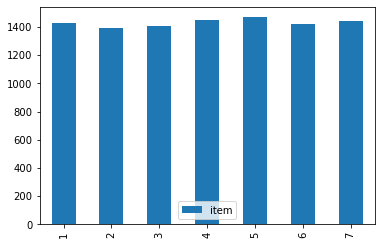

In [26]:
# return 10000 random numbers between 1-7
list_rand7 = [rand7() for _ in range(10000)]
evaluation(list_rand7)

### 4.2 Use rand7() to create a rand5() function

Generate a random integer from 1 to 5 by using a new rand5() function built from rand7(), with equal probability.

In [27]:
# rand5() function definition
def rand5():
    result = 7
    while result > 5:
        result = rand7()
    return result

OrderedDict([(1, 1988), (2, 2036), (3, 2027), (4, 1983), (5, 1966)])


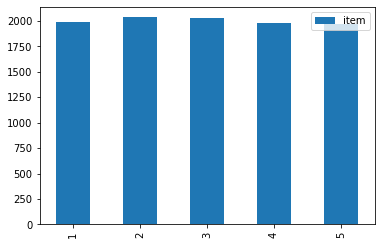

In [28]:
list_rand5 = [rand5() for _ in range(10000)]
evaluation(list_rand5)

### 4.3 Use a rand5() function to generate a random integer between 1 and 7

Let's have a look at how the standard rand5() function behaves.

In [29]:
# rand5() standard function
def rand5():
    return random.randint(1, 5)

OrderedDict([(1, 2002), (2, 2045), (3, 1933), (4, 2023), (5, 1997)])


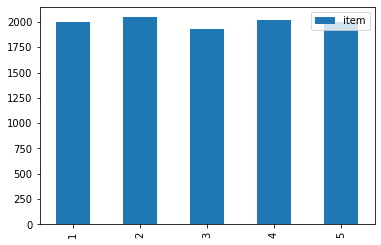

In [30]:
# return 10000 random numbers between 1 and 5
list_rand5 = [rand5() for _ in range(10000)]
evaluation(list_rand5)

To generate also 6 and 7 in the output we need to modify the rand7() function.

In [31]:
# new rand7() modified function
def rand7_mod():
    return (rand5() + rand5()) % 7 + 1

OrderedDict([(1, 1598), (2, 1209), (3, 1162), (4, 1192), (5, 1189), (6, 1597), (7, 2053)])


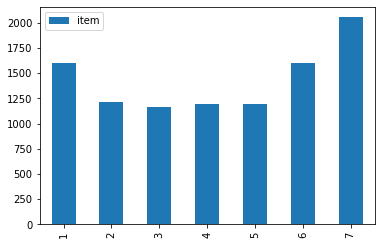

In [32]:
# return 10000 random numbers between 1 and 7
list_rand7_mod = [rand7_mod() for _ in range(10000)]
evaluation(list_rand7_mod)

Why aren't we getting equal probability? The current function leads to 7 in five different outcomes, but leads to 5 in only 3 different outcomes. In addition, the total number of ourcomes of two rand5() calls is 25 (5*5). The function needs to be modified to ensure that the we get the same number of outcomes for each of the 7 integers.

Factorization: both 5 and 7 are prime integers, and if any power of 5 were divisible by 7, 7 would be in its prime factorization. As 7 can't be in its prime factorization (it's prime factorization is all 5s as it has only one prime factorization), no power of 5 is divisible by 7.

In [33]:
# outcome_number = roll1 * 5 + roll2

# two-digit base-5 integer (roll1 -> the fives digit, roll2 -> the ones digit)
# outcome_number = ((roll1-1) * 5 + (roll2-1)) + 1

In [34]:
# correct rand7() modified function with correct distribution
def rand7():
    while True:
        # roll dice
        roll1 = rand5()
        roll2 = rand5()
        # ensure that each roll is between 1 and 25
        outcome_number = (roll1 - 1) * 5 + (roll2 - 1) + 1
        # if we get an outcome > 21
        if outcome_number > 21:
            # reroll again
            continue
        # if <= 21 return the outcome
        return outcome_number % 7 + 1

OrderedDict([(1, 1432), (2, 1416), (3, 1418), (4, 1414), (5, 1430), (6, 1433), (7, 1457)])


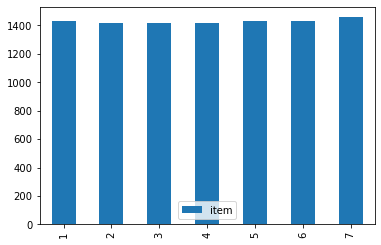

In [35]:
# return 10000 random numbers between 1 and 7
list_rand7 = [rand7() for _ in range(10000)]
evaluation(list_rand7)